# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Этапы исследования:**
* Обзор данных
* Предобработка данных, в том числе:
 * Удаление пропусков
 * Изменение типов данных
 * Обработка аномальных значений
* Добавление  дополнительных данных
* Исследовательский анализ данных
* Выводы

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотеки для работы с таблицами
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Применяем try .. except для обработки возможных ошибок и открываем датасет
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    #data_raw = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    #data_raw = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# просмотр первых 20 строк данных
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# сохраним изначальное количество строк
shape = data.shape[0]
shape

23699

In [5]:
# просмотр основной информации 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Предварительные выводы: в таблице 23699 строк, 22 столбца, есть много пропусков, некоторые столбцы (напр., количество балконов, количество этажей, и т.п.) целесообразно перевести в целочисленный формат. 

In [6]:
# общая информация о количественных данных в таблице 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** Разброс данных большой, заметны артефакты. Например, максимальная высота потолков (100 м) или количество комнат (19).  Площади квартир находятся в диапазон от 12 (комнаты в общежитиях?) до 900 кв. м. Разброс цен огромный: от 12190 до 763 млн.

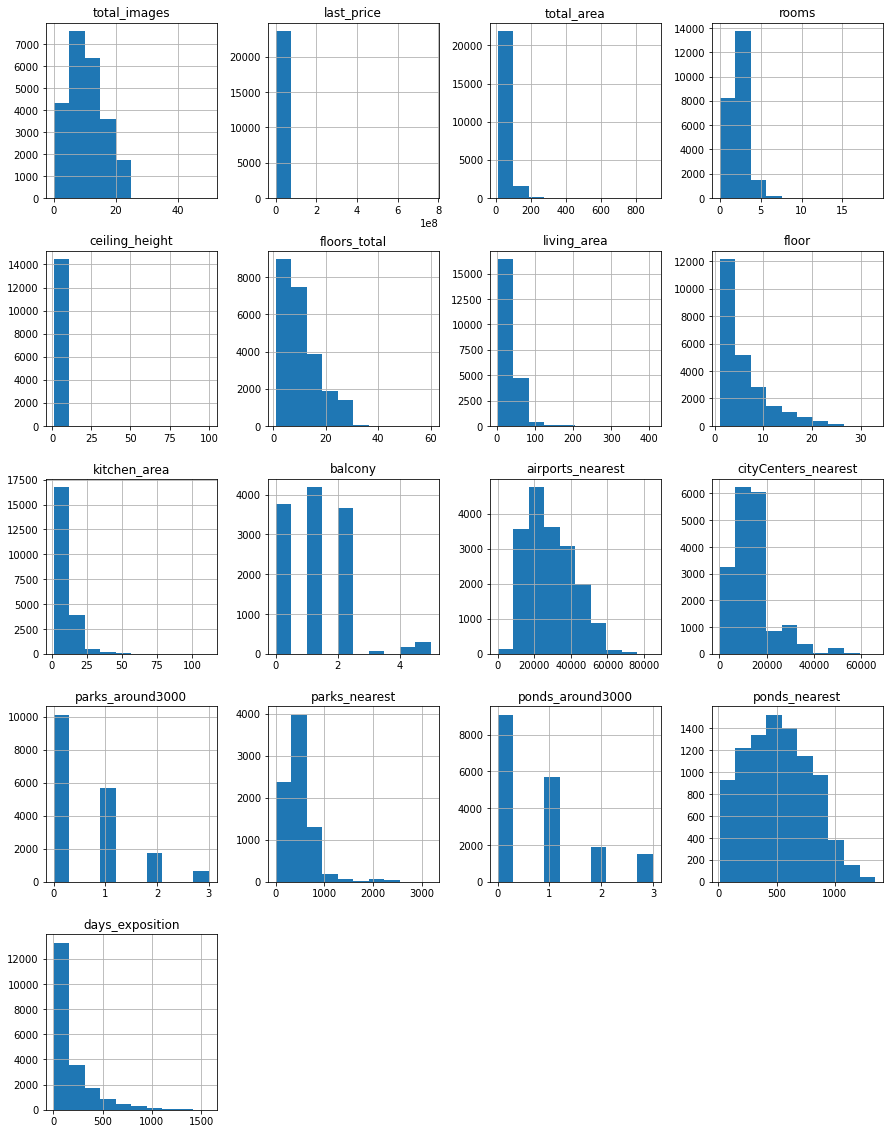

In [7]:
# постром гистограммы по "сырым" данным
data.hist(figsize=(15, 20));

### Предобработка данных

In [8]:
# переименуем столбцы со стилистическими нарушениями 
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'studio': 'is_studio', 
                            'open_plan': 'is_open_plan',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'
                           })

# выведем итоговые названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Пропуски, типы данных, артефакты

**Общее количество пропусков**

In [9]:
# подсчет количества пропущенных значений в каждой категории данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков очень много. В графе с балконами это, скорее всего, означает отсутствие балкона, можно смело заполнить нулями. 
во многих графах пропуски могли появиться по причине того, что продавец просто не заполнил их из-за незнания этих параметров.
В графах с количеством парков и водоемов в радиусе 3000м (parks_around_3000 и ponds_around_3000 соответственно) пропуски вероятно означают отсутствие парков/водоемов вблизи объекта, а также влекут пропуски в графах с расстоянием до этих "улучшений".
(?)

**balcony, is_apartment**  
Сразу можно заполнить пропуски в графах "balcony" и "is_apartment". В первом случае пропуск почти 100% означает отсутсвие балкона, т.к. его наличие является преимуществом при продаже квартиры и продавец заполнил бы эти данные. В случае с типом объекта (апартаменты/нет) продавец тоже сразу заполнил бы графу.

In [10]:
# заполняем пропуски в графах balcony, is_apartment
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [11]:
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

В принципе все нормально. Аномальных значений нет.

**ceiling_height**  
В графе "высота потолков" пропуски логично заполнить медианным значением, т.к. в случае каких-то преимуществ (например, потолки выше среднего) продавец не пропустил бы эти графы.

In [12]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Обзор данных: высота потолков колеблется от 1 до 100 м. Налицо явные артефакты. 

In [13]:
# заполянем пропуски медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Посмотрим на наличие артефактов, где, например, высота потолков больше 5 м или меньше 2 м.

In [14]:
len(data[data['ceiling_height'] > 5]) + len(data[data['ceiling_height'] < 2])

39

Итого 39 строк с аномальными значениями. Вероятно, потолки в 27 метров это фактически 2.7 м. Скорректируем, разделив на 10. В строках с аномально низкими значениями (меньше 2м), присвоим типовое значение высоты потолка - 2.5 м.

In [15]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 5, data['ceiling_height']/10)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] > 2, 2.5)

**rooms**

Посмотрим уникальные значения в столбце.

In [16]:
data['rooms'].unique()
# data['rooms'].value_counts()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Помимо подозрительного числа комнат в количестве 12, 19 и т.п.. Оставим пока так, возможно, это чьи-то дворцы. 
Есть объекты с нулевым количеством комнат. Вероятно, имелись ввиду однокомнатные квартиры-студии, где единое пространство разделено на зону кухни и жилую зону. Эти нули можно заменить на 1. 

In [17]:
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)

In [18]:
# проверка
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

**living_area, kitchen_area**  
Пропуски в жилой площади и площади кухни заполним с помощью медианных коэффициентов долей этих площадей в общей площади. 


In [19]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [20]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [21]:
# расчет коэффициента долей жилой площади и площади кухни в общей площади
living_area_ratio = data['living_area'].median() / data['total_area'].median()
kitchen_area_ratio = data['kitchen_area'].median() / data['total_area'].median()

# заполняем пропуски с учетом рассчитанных коэффициентов
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_area_ratio * data['total_area'], inplace=True)

Посмотрим аномалии в столбцах с жилой площадью и площадью кухни.

In [22]:
data[data['living_area'] > 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.00,4,False,False,False,17.000,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.00,3,False,False,False,55.475,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
335,1,21800000.0,163.4,2017-12-10T00:00:00,5,3.50,5.0,119.50,2,False,False,False,10.000,0,Санкт-Петербург,26791.0,5493.0,1.0,349.0,0.0,NaN,106.0
417,5,14200000.0,178.0,2017-10-26T00:00:00,5,3.30,4.0,126.60,2,False,False,False,19.400,0,Санкт-Петербург,24287.0,2835.0,0.0,NaN,3.0,257.0,104.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,2.50,8.0,159.50,7,False,False,False,21.100,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23299,20,25900000.0,167.1,2017-08-28T00:00:00,4,2.75,15.0,102.30,6,False,False,False,22.300,1,Санкт-Петербург,29860.0,7232.0,0.0,NaN,3.0,212.0,110.0
23395,4,40000000.0,188.0,2017-05-29T00:00:00,6,2.65,6.0,109.51,4,False,False,False,31.300,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0
23400,17,30000000.0,213.0,2017-09-28T00:00:00,7,3.40,5.0,151.40,5,False,False,False,30.800,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0
23448,3,14700000.0,180.0,2018-02-08T00:00:00,6,3.00,6.0,126.00,5,False,False,False,20.000,0,Санкт-Петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN


In [23]:
data[data['kitchen_area'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.000000,3,False,False,False,55.4750,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.000000,4,False,False,False,77.0000,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.90,7.0,210.576923,7,False,False,False,63.8750,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,2.50,3.0,190.000000,3,False,False,False,63.0000,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.700000,4,False,False,False,66.0000,0,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,2.50,6.0,230.192308,6,False,False,False,69.8250,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,175.384615,7,False,False,False,53.2000,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2489,9,12500000.0,255.0,2017-04-21T00:00:00,3,2.65,2.0,153.900000,2,False,False,False,100.7000,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,364.038462,5,False,False,False,60.0000,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3561,5,12300000.0,115.0,2017-08-09T00:00:00,3,2.70,20.0,45.000000,16,False,False,False,60.0000,1,Санкт-Петербург,33386.0,14234.0,0.0,NaN,0.0,NaN,63.0


Есть, конечно, большие числа по каждому из столбцов, но они "бьются" с большой общей площадью. Оставим, как есть. Округлим площади до двух знаков после запятой.

In [24]:
data['kitchen_area'] = data['kitchen_area'].round(2)
data['living_area'] = data['living_area'].round(2)

**locality_name**  
Выберем те строки таблицы, где не заполнены данные о населенном пункте, и посмотрим, какое указано расстояние до центра города.


In [25]:
data[(data['locality_name'].isnull())][['locality_name', 'city_centers_nearest']].sort_values(by='city_centers_nearest', ascending=False).head(15)

,locality_name,city_centers_nearest
21276,NaN,41294.0
21119,NaN,31897.0
8986,NaN,31813.0
13690,NaN,23659.0
6765,NaN,17369.0
14273,NaN,17369.0
16499,NaN,17369.0
2603,NaN,17369.0
13223,NaN,17369.0
19972,NaN,17369.0


Протяжённость Санкт-Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД, — около 90 км. Все строки, где расстояние до центра находится в пределах 16 км (32/2), можно смело отнести к Санкт-Петербургу. Остальные строки можно удалить, т.к. их количество мизерное по отношению к общеиму объему выборки. 

In [26]:
# заполняем пропуски
data.loc[data['city_centers_nearest'] < 16000, 'locality_name'].fillna('Санкт-Петербург')
# смотрим, сколько пустых строк осталось
data['locality_name'].isna().sum()

49

In [27]:
data= data.dropna(subset=['locality_name'])

**floors_total**  

In [28]:
print('Доля пропусков в графе floors_total:', data['floors_total'].isna().sum()/len(data))

Доля пропусков в графе floors_total: 0.003594080338266385


Возможная причина пропусков: продавец сознательно или не сознательно пропустил при заполнении эту графу. На будущее следует сделать заполнение этой графы обязательным, т.к. от показателя зависит, находится ли квартира на крайнем этаже или нет, что влияет на цену объекта. 
Пропусков в столбце floors_total крайне мало, при этом не очень понятно, как корректно их заполнить. В связи с чем принято решение удалить эти строки.

In [29]:
data = data.dropna(subset=['floors_total'])
# сразу меняем формат на целочисленный
data['floors_total'] = data['floors_total'].astype('int')

**parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, airports_nearest, city_centers_nearest**  

По аналогии с количеством балконов заполним пропуски в столбцах parks_around_3000 и ponds_around_3000 нулями, сразу приведем к цельночисленному формату. Данных о расстоянии до ближайшего пруда или парка у нас нет, оставлим эти пропуски.

В данныз о расстоянии до центра города, до аэропорта тоже есть пропуски. Предположительно, эта часть информации должна была заполняться автоматически на основании данных о геолокации конкретного объекта. Этих данных у нас нет, считаем более правильным оставить пропуски, чем заполнять какими-то синтетическими данными.



In [30]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')

Среди "подозрительных" объектов был замечен объект, где расстояние до аэропорта равно 0. Посмотрим.

In [31]:
data.query('airports_nearest < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Удаляем эту строку, квартир в аэропорту быть не может.

In [32]:
data = data.query('airports_nearest != 0')

**first_day_exposition, days_exposition**  
В  столбце days_exposition также есть пропуски. Это может быть связано с тем, что объект либо еще не продан, либо был продан, но объявление с продажи не снято. Вносить какие-то расчетные данные считаю некорректным. Оставляем как есть.

In [33]:
# приведем формат столбца из строки в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# проверка
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15534
ponds_around_3000           0
ponds_nearest           14528
days_exposition          3171
dtype: int64

**last_price**  
Тут пропусков нет, поменяем только тип данных. Разброс цен большой:

In [35]:
data['last_price'].describe()

count    2.356400e+04
mean     6.540039e+06
std      1.091117e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [36]:
data['last_price'] = data['last_price'].astype('int')

#### Дубликаты

Для поиска явных дубликатов приведем все названия населенных пунктов к нижнему регистру, букву "ё" заменим на "е".

In [37]:
# посмотрим количество населенных пунктов до замены
len(data['locality_name'].unique())

364

In [38]:
# перевод в нижний регистр
data['locality_name'] = data['locality_name'].str.lower()
# замена буквы
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

Проверка на явные дубликаты.

In [39]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [40]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Населенных пунктов много. При беглом просмотре явных повторов нет, но для надежности можно заменить типа "поселок городского типа" на "поселок"

In [41]:
# меняем наименования населенных пунктов и считаем количество
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
len(data['locality_name'].unique())

329

Было 364, стало 329.

In [42]:
# повторная проверка на явные дубликаты
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [43]:
# дополнительно посмотрим аномалии в столбцах с общей площадью, количеством комнат, ценой объекта
data[['total_area', 'rooms', 'last_price']].describe()

,total_area,rooms,last_price
count,23564.000000,23564.000000,2.356400e+04
mean,60.323911,2.078934,6.540039e+06
std,35.657425,1.066502,1.091117e+07
min,12.000000,1.000000,1.219000e+04
25%,40.000000,1.000000,3.400000e+06
50%,52.000000,2.000000,4.646000e+06
75%,69.700000,3.000000,6.790000e+06
max,900.000000,19.000000,7.630000e+08


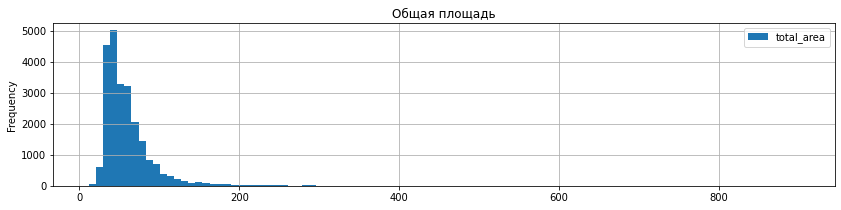

In [44]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(14,3), title='Общая площадь')
plt.show() 

На графике видно, что квартиры общей площадью более примерно 350 кв. м - скорее редкость. Посмотрим их количество.

In [45]:
print('Количество квартир общей площадью > 350 кв. м.:', data.query('total_area > 350')['total_area'].count())

Количество квартир общей площадью > 350 кв. м.: 41


In [46]:
# список строк на удаление
rows_to_del = []
rows_to_del.extend(data['total_area'][data['total_area']>350].index)

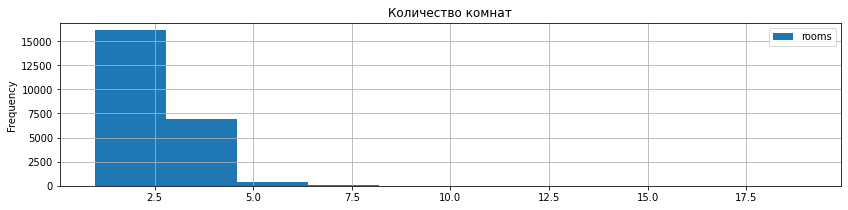

In [47]:
data.plot(y='rooms', kind='hist', bins=10, grid=True, figsize=(14,3), title='Количество комнат')
plt.show()

Квартиры, где более 8 комнат, скорее аномалии. Посчитаем количество.

In [48]:
print('Количество квартир более чем с 8 комнатами:', data.query('rooms > 8')['rooms'].count())

Количество квартир более чем с 8 комнатами: 19


In [49]:
# добавим с список индексы строк на удаление
rows_to_del.extend(data['rooms'][data['rooms']>8].index)

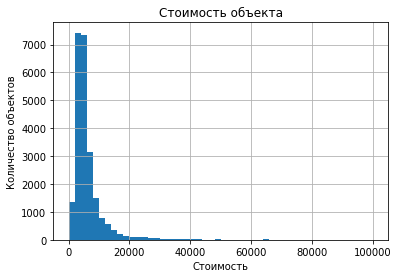

In [50]:
#data.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(14,3), title='Стоимость объекта')
#plt.show()
plt.hist(data['last_price']/1000, bins=50, range=(0, 100000))
plt.title('Стоимость объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество объектов')
plt.grid(True)
plt.show()

In [51]:
print('Количество квартир дороже 50млн. руб.:', data.query('last_price > 50000000')['last_price'].count())

Количество квартир дороже 50млн. руб.: 131


In [52]:
# добавим с список индексы строк на удаление
rows_to_del.extend(data['last_price'][data['last_price']>50000000].index)

In [53]:
# итого строк на удаление
len(pd.Series(rows_to_del).unique())

161

In [54]:
# процент от общего числа строк:
print('Процент числа строк на удаление:', round((len(pd.Series(rows_to_del).unique())/ shape)*100, 2))

Процент числа строк на удаление: 0.68


Число строк на удаление меньше 5%, можно удалять.

In [55]:
# удаляем помеченные строки
data.drop(labels = rows_to_del, axis=0, inplace=True)
# Сбрасываем индексы
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23399,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0
23400,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,9.92,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23401,13,11475000,76.75,2017-03-28,2,3.00,17,44.28,12,False,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу новые столбцы:  
* цена одного квадратного метра;  
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


In [56]:
# цена одного кв. м, округляем до двух знаков после запятой
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].round(2)

# день недели публикации
data['day'] = data['first_day_exposition'].dt.weekday
# месяц публикации
data['month'] = data['first_day_exposition'].dt.month
# год публикации
data['year'] = data['first_day_exposition'].dt.year

In [57]:
# добавляем столбец с типом этажа. По умолчанию заполним значением other
data['floor_type'] = ['other']*len(data)
# если этаж - 1, заполняем значением first
data.loc[data['floor'] == 1, 'floor_type'] = 'first' 
# если этаж последний (равен количеству этажей в здании), заполняем last
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last' 

In [58]:
# расстояние до центра города в км
data['city_centers_km'] = data['city_centers_nearest'] / 1000
data['city_centers_km'] = data['city_centers_km'].round(0)

In [59]:
# посмотрим, что получилось
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,day,month,year,floor_type,city_centers_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,other,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,other,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,other,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,other,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017,other,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.31,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019,other,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018,other,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,other,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.25,3,11,2017,other,14.0


### Проведите исследовательский анализ данных

#### Обзор параметров

In [60]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,day,month,year,city_centers_km
count,23403.000000,2.340300e+04,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,23403.000000,17884.000000,17905.000000,23403.000000,7908.000000,23403.000000,8913.000000,20270.000000,23403.000000,23403.000000,23403.000000,23403.000000,17905.000000
mean,9.860659,5.962356e+06,58.838799,2.056360,2.693507,10.701320,33.762325,5.883263,10.326230,0.595009,28820.538973,14270.095057,0.461479,492.213202,0.582618,520.627286,179.885940,97583.682228,2.565697,6.402171,2017.373756,14.264004
std,5.670671,4.881124e+06,29.130861,1.008778,0.214264,6.604275,18.873946,4.880107,5.386842,0.961028,12671.582961,8602.515197,0.739916,341.825426,0.877240,278.198941,218.966202,39637.713514,1.788034,3.493195,1.035185,8.610071
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,111.830000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18516.000000,9403.000000,0.000000,288.000000,0.000000,297.000000,45.000000,76455.675000,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26786.000000,13149.000000,0.000000,456.000000,0.000000,505.000000,95.000000,94805.190000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37348.000000,16316.000000,1.000000,613.000000,1.000000,733.000000,230.000000,113772.460000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,5.000000e+07,347.500000,8.000000,10.000000,60.000000,230.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848484.850000,6.000000,12.000000,2019.000000,66.000000


* ***Общая площадь (total_area), жилая площадь (living_area), площадь кухни (kitchen_area)***  

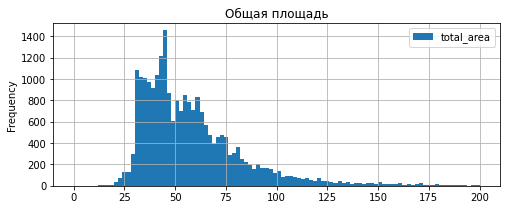

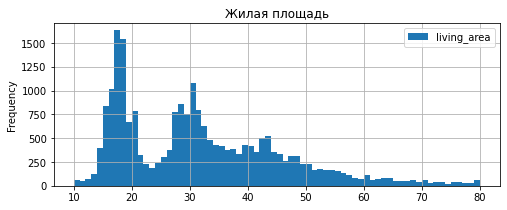

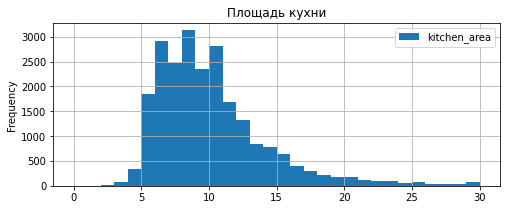

In [61]:
# Общая площадь
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(8,3), range=(0,200), title='Общая площадь')
plt.show() 
# жилая площадь
data.plot(y='living_area', kind='hist', bins=70, grid=True, figsize=(8,3), range=(10,80), title='Жилая площадь')
plt.show() 
# площадь кухни
data.plot(y='kitchen_area', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0,30), title='Площадь кухни')
plt.show() 

**Выводы:**   
* *total_area* - В основном представлены квартиры общей площадью от 45 до 70 кв. м. В выборке есть незначительное количество квартир с площадью более 100 кв. м. 
* *living_area* - наиболее часто встречаются квартиры с жилой площадью примерно до 50 кв. м. В районе 23-25 кв. м наблюдается некоторый провал. Видимо, этого количества жилой площади "много" для 1-комнатных квартир и мало для 2(и более)-комнатных квартир.
* *kitchen_area* - В основном представлены кухни площадью 5-15 кв. м, что типично для рынка. Незначительное количество с площадью более 20 кв. м. 

* ***Этаж (floor), тип этажа (floor_type), общее количество этажей (floors_total)***

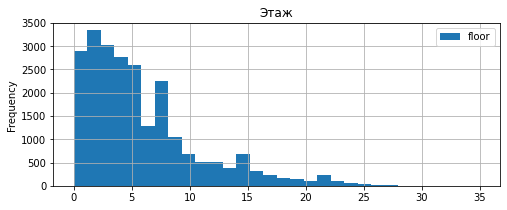

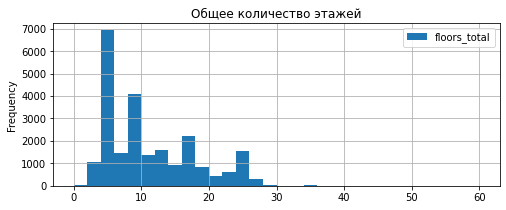

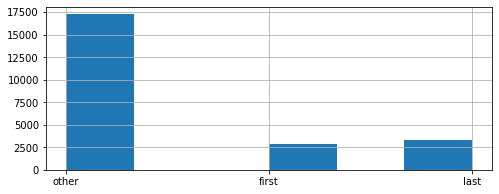

In [62]:
# Этаж
data.plot(y='floor', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0,35), title='Этаж')
plt.show() 
# Этажность дома
data.plot(y='floors_total', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0,60), title='Общее количество этажей')
plt.show() 
# Тип этажа
data['floor_type'].hist(bins=6, figsize=(8,3))
plt.show() 

**Выводы:**    
* *floor* - В основном представлены квартиры на 1-5. 7-8 этажах, выше - ощутимо меньшее количество.
* *floors_total* - наиболее часто встречаются квартиры в 5 и 9-этажных домах. Небольшие пики в районе 18 и 25 этажей, видимо, дома новой постройки.
* *floor_type* - Вполне логично, что наибольшее количество квартир представлено на средних (не крайних) этажах. 

* ***Количество комнат (rooms), высота потолков (ceiling_height)***  

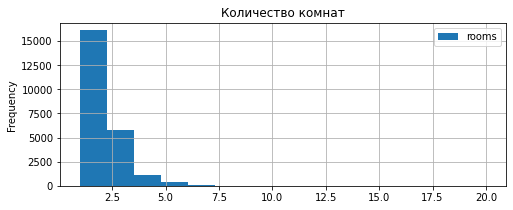

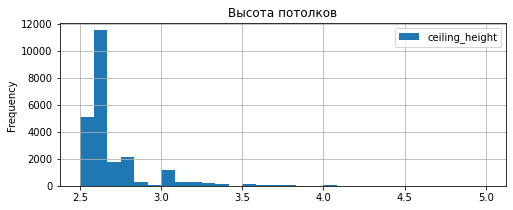

In [63]:
data.plot(y='rooms', kind='hist', bins=15, grid=True, figsize=(8,3), range=(1,20), title='Количество комнат')
plt.show() 
data.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(8,3), range=(2.5,5), title='Высота потолков')
plt.show()

**Выводы:**  
* *rooms* - Традиционно самые популярные квартиры - 1-2-комнатные, меньше 3-комнатных. Многокомнатных (5 и более) - незначительное количество.
* *ceiling_height* - логично, что самые распространенные это квартиры с высотой потолков в районе 2.7м, небольшой пик в районе 3м. Выше - незначительное количество.


* ***Цена объекта (last_price)***  

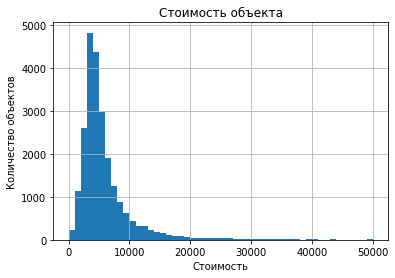

In [64]:
#max_price = data['last_price'].max()
#max_price
#data.plot(y='last_price', kind='hist', bins=50, grid=True, range = (0,2e+07), figsize=(8,3), title='Цена объекта')
# plt.show() 

plt.hist(data['last_price']/1000, bins=50, range=(0, 50000))
plt.title('Стоимость объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество объектов')
plt.grid(True)
plt.show()

**Вывод:**  
* *last_price* - Основная масса квартир в районе 4-5 млн. руб. Наблюдается длинный "хвост" - это, видимо, элитная недвижимость.

* ***Расстояние до центра города (city_centers_nearest), расстояние до ближайшего аэропорта (airports_nearest), парка (parks_nearest), день и месяц публикации объявления (day, month)***  

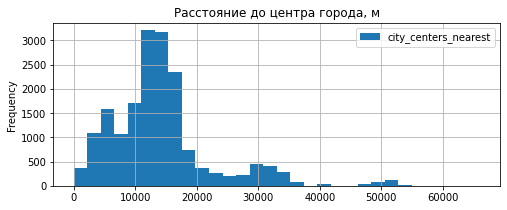

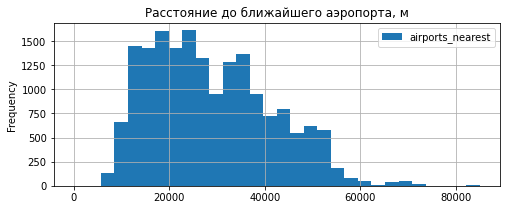

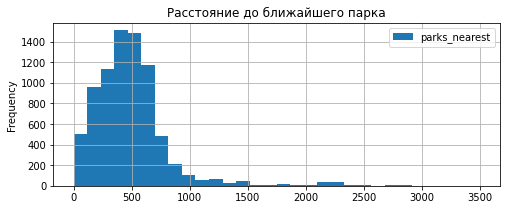

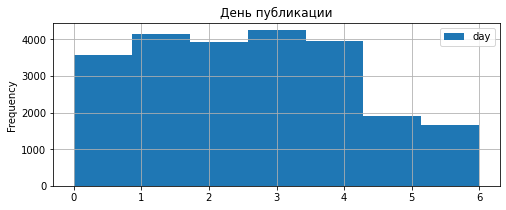

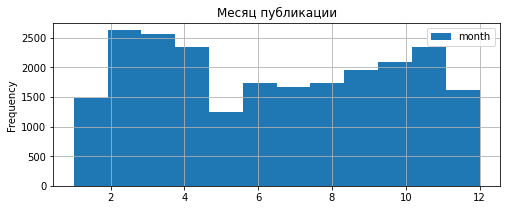

In [65]:
# расстояние до центра города
data.plot(y='city_centers_nearest', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0, 66000), title='Расстояние до центра города, м')
plt.show() 
# расстояние до аэропорта
data.plot(y='airports_nearest', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0, 85000), title='Расстояние до ближайшего аэропорта, м')
plt.show()
# расстояние до парка
data.plot(y='parks_nearest', kind='hist', bins=30, grid=True, figsize=(8,3), range=(0, 3500), title='Расстояние до ближайшего парка')
plt.show()
# день публикации
data.plot(y='day', kind='hist', bins=7, grid=True, figsize=(8,3), title='День публикации')
plt.show()
# месяц публикации
data.plot(y='month', kind='hist', bins=12, grid=True, figsize=(8,3), title='Месяц публикации')
plt.show()

**Выводы:**   
* *city_centers_nearest* - видны два пика: квартиры на расстоянии примерно 5км и 12-16 км от центра города. В районе 30км также небольшой пик. 
* *airports_nearest* - тут вообще разброс большой: от 15 до 50 км.
* *parks_nearest* - тут все красиво, у большинства объектов парк в относительно пешей доступности - от 300 до 700 м, более удаленных от парков квартир ощутимо меньше. 
* *day* - в основном объявления публикуются в будни, примерно в одинаковом количестве, в выходные - примерно в два раза реже. 
* *month* - наибольшая активность с февраля по апрель, дальше идет небольшой спад (лето, сезон дач и отпусков), ближе к осени снова начинается рост примерно до ноября, декабрь-январь - традиционный новогодний спад на рынке недвижимости.

#### Исследование срока экспозиции объектов (days_exposition)


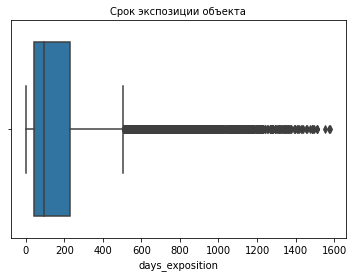

Медианный срок экспозиции: 95.0
Средний срок экспозиции: 180.0


In [66]:
# диаграмма размаха
sns.boxplot(x='days_exposition', data=data)
plt.title('Срок экспозиции объекта', fontsize=10)
#plt.xlim(0,1000)
plt.show()

# медиана
print('Медианный срок экспозиции:', data['days_exposition'].median())
# среднее
print('Средний срок экспозиции:', data['days_exposition'].mean().round())

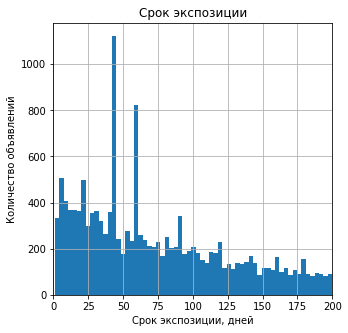

count    20270.000000
mean       179.885940
std        218.966202
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [67]:
plt.figure(figsize=(5,5))    
data.days_exposition.hist(bins=500)
plt.xlabel('Срок экспозиции, дней')
plt.ylabel('Количество объявлений')
plt.title('Срок экспозиции')
plt.xlim(0,200)
plt.show()

data['days_exposition'].describe()

**Вывод:** 
Медианный срок экспозиции жилой недвижимости - 95 дней, средний - 181 день. 
В основном квартиры продаются за срок в 100 дней. На гистограмме виды пики в районе 45 и 60 дней, которые сильно выбиваются из общей картины. Возможно, это как-то связано с правилами публикации объявлений сервиса Яндекс.Недвижимость. 
Быстрой продажей можно считать срок менее 45 дней. Долгой - от 231 дня.

#### Влияние факторов на общую стоимость объекта


In [68]:
# построим матрицу корреляций для исследуемых параметров
data_corr = data[['last_price', \
                  'total_area', \
                  'living_area', \
                  'kitchen_area', \
                  'rooms', 
                 ]].corr()
data_corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.778367,0.684958,0.618406,0.497995
total_area,0.778367,1.000000,0.936782,0.620261,0.789058
living_area,0.684958,0.936782,1.000000,0.423674,0.862102
kitchen_area,0.618406,0.620261,0.423674,1.000000,0.282616
rooms,0.497995,0.789058,0.862102,0.282616,1.000000


Из матрицы корреляций видно, что наибольшая зависимость у цены объекта от общей площади, поменьше от площади жилой и кухни и еще меньше, но есть, от количества комнат. Разберем каждый параметр отдельно.

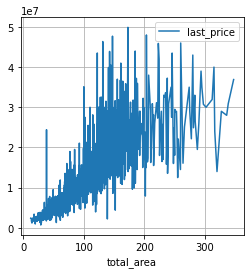

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.879689
total_area    0.879689    1.000000 



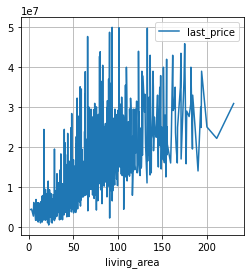

Корреляция цены и жилой площади: 

             last_price  living_area
last_price      1.00000      0.73464
living_area     0.73464      1.00000 



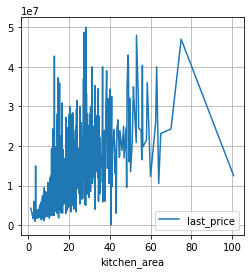

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.391126
last_price        0.391126    1.000000 



In [69]:
# Влияние общей площади на стоимость 
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='-', figsize=(4,4), y='last_price')
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Влияние жилой площади на стоимость
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='-', figsize=(4,4), y='last_price')
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

# Влияние площади кухни на стоимость
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='-', figsize=(4,4), y='last_price')
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

**Вывод:** Логично, что чем больше общая площадь объекта, тем выше общая стоимость объекта, коэффициент коррелиции достаточно высокий - 0,88, зависимость прямая и сильная. Аналогичный вывод можно сделать и по влиянию жилой площади на стоимость, коэф. коррелиции - 0,73. А вот от площади кухни стоимость хоть и зависит, но уже не так сильно, коэф. коррелиции - 0,39.

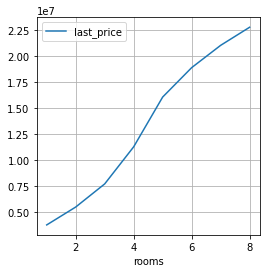

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.583536
rooms         0.583536  1.000000 



In [70]:
# Влияние количества комнат на стоимость
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='-', figsize=(4,4),  y='last_price')
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

**Вывод:** Количество комнат влияет на цену (чем больше комнат, тем выше цена), но зависимость не такая сильная как с площадями.

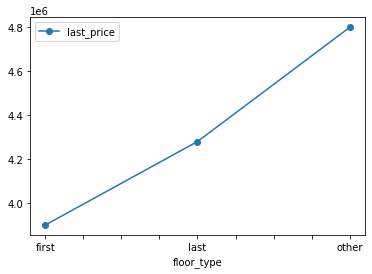

In [71]:
# Влияние типа этажа на стоимость
data.groupby('floor_type')['last_price'].median().plot(x='floor_type',y='last_price',style='o-',legend=True)
plt.show()

**Вывод.** Цены на первом этаже, очевидно, самые низкие. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на крайних этажах.

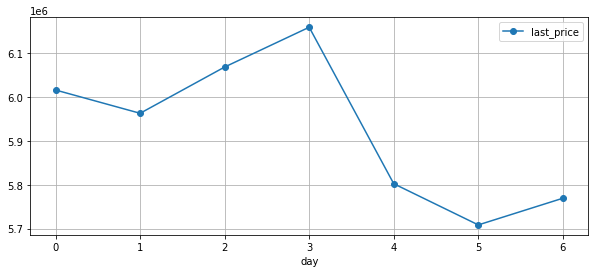

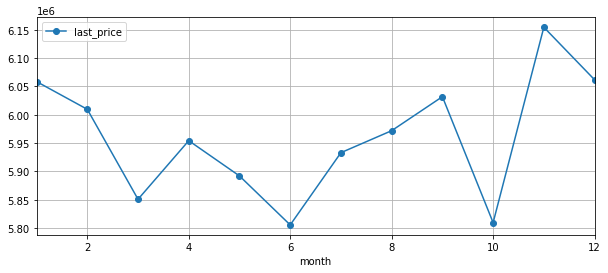

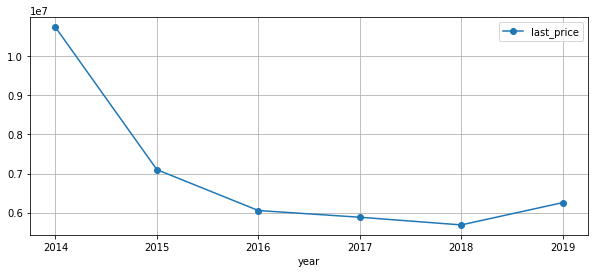

In [72]:
# Влияние дня недели публикации
data.pivot_table(index='day', values='last_price').plot(grid=True, style='o-', figsize=(10,4))
plt.show()
# Влияние месяца публикации
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10,4))
plt.show()
# ВЛияние года публикации
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(10,4))
plt.show()

**Вывод:**  
День недели: цена выше у квартир, выставленных на продажу в середине недели.
Месяц публикации: дороже всего квартиры, выставленные на продажу в апреле и сентябре.
Год публикации: Начиная с 2014 года цена на квартиры падала, но начиная к 2019 наблюдается плавный рост. 

#### Сравнение средней стоимости 1 кв. м жилья в топ-10 населенных пунктов


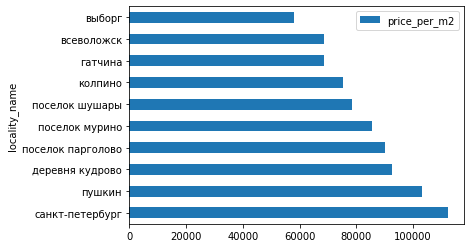

In [73]:
# Отбор 10 населенных пунктов с наибольшим количеством объявлений:
locality_top_10 = data['locality_name'].value_counts().index[0:10]
locality_top_10

# Рассчет средней стоимости кв. м в списке locality_top_10
(data
     .query('locality_name in @locality_top_10')
     .pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean')
     .sort_values(by='price_per_m2', ascending=False).round(2)
     .plot(kind='barh')
     );

**Вывод:** Среди топ-10 населенных пунктов с наибольшим количеством объявлений ожидаемо самая высокая стоимость 1 кв. м жилья в Санкт-Петербурге. В Выборге - минимальная цена 1 кв. м среди топ-10 населенных пунктов.

#### Анализ цен предложений в г. Санкт-Петербурге


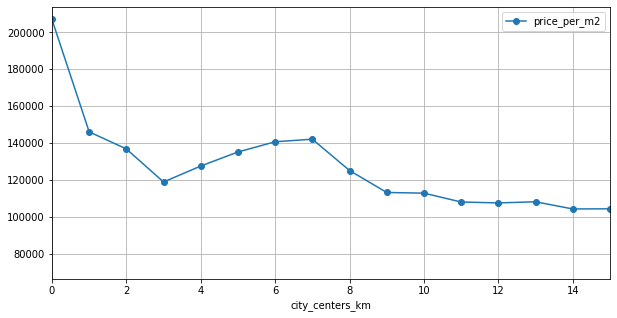

In [74]:
# Отбор объявлений по населенному пункту (Спб), 
# строим график заивисмости цены за 1 кв. м от параметра "расстояние до центра города"
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_km', values='price_per_m2', aggfunc = 'mean')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()


На графике видно, что после 7 км наблюдается снижение стоимости 1 кв. м жилья. В связи с чем можно считать центральной зоной - удаленность в пределах 7 км. 

In [75]:
# сделам сводную таблицу с удаленностью от центра и стоимостью 1 кв. м по Спб
pivot_table_km = data.query('locality_name == "санкт-петербург"') \
                 .pivot_table(index='city_centers_km', values='price_per_m2', aggfunc = 'mean')
pivot_table_km.head(15)

,price_per_m2
city_centers_km,
0.0,207075.888696
1.0,146068.259148
2.0,136788.859031
3.0,118845.980233
4.0,127515.757500
5.0,135137.555102
6.0,140678.404054
7.0,142087.445758
8.0,125073.007665


**Вывод:** Итак, выяснили, что центром Санкт-Петербурга можно считать удаленность в пределах 7 км. По сводной таблице видно, что, начиная с 8 км, начинает плавно снижаться стоимость 1 кв. м.

### Общий вывод

Произведен анализ рынка жилой недвижимости г. Санкт-Петербурга и соседних населенных пунктов. Основные выводы следующие:  
* Больше всего на рынке представлено квартир общей площадью 45-70 кв. м, на средних (не крайних) этажах в 5-9-этажгных домах. 
* Основная масса квартир стоит в районе 4-5 млн. рублей, но есть и значительно более дорогие, элитные объекты.
* У больше части объектов есть в пешей доступности парк.
* Наибольшая активность на рынке жилой недвижимости наблюдается в районе февраля-апреля и осенью. Летом, в сезон отпусков, традиционный спад.
* В среднем квартиры продаются за срок в 100 дней. Продажу менее чем за 45 дней можно считать быстрой.
* Самая дорогая недвижимость в Санкт-Петербурге и г. Пушкин. 
* Начиная с 2014 года цена на квартиры падала, но начиная к 2019 наблюдается плавный рост.
* Основные ценообразующие факторы на рынке жилой недвижимости: общая и жилая площадь, местоположение (удаленность от центра населенного пункта), количество комнат, расположения (первый - самый дешевый) и площадь кухни. (Естественно, одним из главных ценообразующих факторов является и состояние объекта (как отделки, так и жилого дома), но данной информации в выборке не представлено).

**Рекомендации для сервиса Яндекс. Недвижимость:**
* Сделать заполнение таких полей как этажность дома, адрес дома обязательным. Это решит проблему с пропусками в соответствующих столбцах, а также при расчете расстояния до центра, парков, и т.д.
* Ввести поля, описывающие состояние отделки объекта (Например, без ремонта/требуется косметический ремонт/хорошее состояние/отличное/улучшенная отделка).
* По точному адресу дома определять его год постройки (жилье в "хрущевках" дешевле жилья в новостройках).
* Данные о расстоянии до аэропорта/парков/водоемов/центра считать в км с округлением, например, до 1 знака.



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод